# Logistic Regression with Python Part I

1. Logistic Regression을 하기전의 이론부분을 설명합니다. 

In [1]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Odds

odds라는 단어는 probability 와 유사하게 쓰이는 경우가 있고, 실제로 두개를 혼동해서 쓰는 경우가 있습니다. <br>
하지만 두개는 명벽하게 다른 의미를 갖고 있습니다. 

**Probability VS Odds**

1. **Probability(확률)**이란 $ \frac{성공횟수}{전체\ 시도\ 횟수} $

2. **Odds(승산)**이란 $ \frac{성공횟수}{실패횟수} $


**Euqal**

1. **Equal Odds** 는 1입니다. 즉 매번 1번 실패할때마다 1번 성공한다는 뜻입니다. **1:1**

2. **Equal Probabilities**는 0.5입니다. 2번 시도할때 1번 성공한다는 뜻입니다. 

**Range**

1. **Odds**는 **0~무한** 까지의 범위를 갖고 있으며, 1이상일 경우 성공확률이 실패확률보다 높다는 뜻입니다. 

2. **Probability**는 **0~1**까지의 범위를 갖고 있습니다. 


**Converting between Odds and Probability**

$$ Odds(Y) = \frac{Pr(Y=1)}{Pr(Y=0)} = \frac{Pr(Y=1)}{1-Pr(Y=1)} $$

$$ Pr(Y=1) = \frac{Odds(Y)}{1+Odds(Y)} = 1 - \frac{1}{1+Odds(Y)} $$

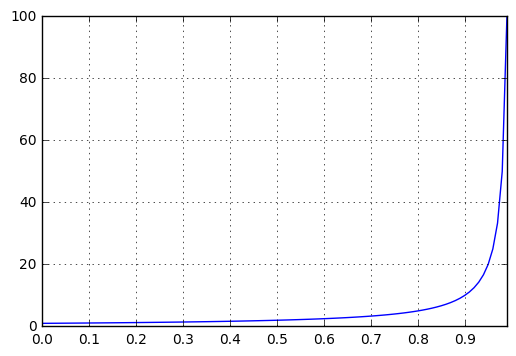

In [12]:
def odds(p):
    return 1./(1.-p)

x = np.arange(0, 1, 0.01)
y = odds(x)

plt.grid()
plt.xticks(np.arange(0, 1, 0.1))

plt.plot(x, y)

# Logit Function

odds에다가 log를 더해서 Linear Model 로 만든것이 Logit Function입니다. <br>
odds자체를 쓰면 0.9이후부터 값이 급격하게 늘어나는 것을 위의 그래프에서 볼수 있습니다. <br>
log를 씌워서 좀 더 Linear하게 값이 떨어지게 만든것이 Logit Function입니다. 

**Logistic Regression Model에서 log-odds는 Linear function으로 가정(assume)합니다.**

### $$ logit(p) = ln(\frac{1}{1 - p}) = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum^n_{i=0} w_mx_m = w^Tx $$

<span class="text-muted">이때 $ w_0 $ 의 값은 bias값으로서 constant이며, $ x_0 $의 값은 1로 줍니다.<br>
즉 n의 값은 실제보다 +1 커지겠죠,. </span>

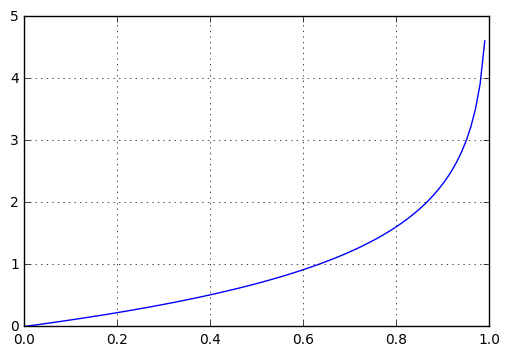

In [2]:
def logit(p):
    return np.log(1./(1.-p))
    
x = np.arange(0, 1, 0.01)
y = logit(x)

plt.grid()
plt.plot(x, y)

위의 공식에서 양변에 exp를 곱해주면 다음과 같이 됩니다.

### $$ \frac{1}{1-P} = exp \left( \sum^{n}_{i=0} w_ix_i \right) = \prod^n_{i=0} exp( w_ix_i ) $$

다음과 같은 공식들을 참고합니다.

* [Exponential Expansions 참고](http://www.math.com/tables/expansion/exp.htm)
* [Algebraic Proof of Sum of Exponential Powers is Product of Exponentials](http://math.stackexchange.com/questions/863576/algebraic-proof-of-sum-of-exponential-powers-is-product-of-exponentials)



$$ e^x = \sum^{\infty}_{n=0} \frac{x^n}{n!} $$

예를 들어서 $ exp(a + b) $ 는 다음과 같습니다.

### Logistic function (Sigmoid function)

Logit function 의 inverse form으로서 

### $ \phi(z) = \frac{1}{1+e^{-z}} $

### References

* [The Simpler Derivation of Logistic Regression](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)